In [1]:
# You can run this script and see the results. Example output is also included
# for each question. Note that there is randomness involved (both in how the
# data is split and also in the Random Forest), so you will not always get
# exactly the same results.
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from roc import plot_roc
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# 1. Load the dataset in with pandas
df = pd.read_csv('./data/churn.csv')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
# 2. Convert the "no" values to 0 and "yes" values to 1.
df["Int'l Plan"] = (df["Int'l Plan"] == 'yes').astype(int)
df["VMail Plan"] = (df["VMail Plan"] == 'yes').astype(int)
df['Churn?'] = (df['Churn?'] == 'True.').astype(int)

In [4]:
# 3. Remove the features which aren't continuous or boolean
drop_cols = ['State', 'Area Code', 'Phone']
df.drop(columns=drop_cols, inplace=True)

In [5]:
# 4. Make a numpy array called y containing the churn values
y = df['Churn?']

In [6]:
# 5. Make a 2 dimensional numpy array containing the feature data (everything except the labels)
# Note that dropping the churn column was not performed in-place. The original dataframe remains afterwards.
X = df.drop(columns=['Churn?'])

In [7]:
# 6. Use sklearn's train_test_split to split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
# 7. Use sklearn's RandomForestClassifier to build a model of your data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# 8. What is the accuracy score on the test data?
print("\n8. score:", rf.score(X_test, y_test))
## answer: 0.9448441247


8. score: 0.9484412470023981


In [10]:
# 9. Draw a confusion matrix for the results
y_predict = rf.predict(X_test)
print("\n9. confusion matrix:")
print(confusion_matrix(y_test, y_predict))


9. confusion matrix:
[[705   7]
 [ 36  86]]


In [11]:
# 10. What is the precision? Recall?
print("\n10. precision:", precision_score(y_test, y_predict))
print("    recall:", recall_score(y_test, y_predict))


10. precision: 0.9247311827956989
    recall: 0.7049180327868853


In [12]:
# 11. Build the RandomForestClassifier again setting the out of bag parameter to be true
rf = RandomForestClassifier(n_estimators=30, oob_score=True)
rf.fit(X_train, y_train)
print("\n11: accuracy score:", rf.score(X_test, y_test))
print("    out of bag score:", rf.oob_score_)
##   accuracy score: 0.9424460431654677
## out of bag score: 0.9483793517406963   (out-of-bag error is slightly better)


11: accuracy score: 0.9424460431654677
    out of bag score: 0.9483793517406963


In [13]:
# 12. Use sklearn's model to get the feature importances
feature_importances = np.argsort(rf.feature_importances_)
print("\n12: top five:", list(df.columns[feature_importances[-1:-6:-1]]))
## top five: ['Day Charge', 'Day Mins', 'CustServ Calls', "Int'l Plan", 'Eve Charge']
## (will vary a little)


12: top five: ['Day Charge', 'Day Mins', 'CustServ Calls', "Int'l Plan", 'Eve Charge']



13. Feature ranking:
1. Day Charge (0.146243)
2. Day Mins (0.135136)
3. Int'l Plan (0.083700)
4. Eve Charge (0.077059)
5. Eve Mins (0.055151)
6. Day Calls (0.033848)
7. Account Length (0.031363)
8. Eve Calls (0.030494)
9. VMail Plan (0.028249)
10. VMail Message (0.028156)


Text(0.5, 1.0, 'Feature Importances')

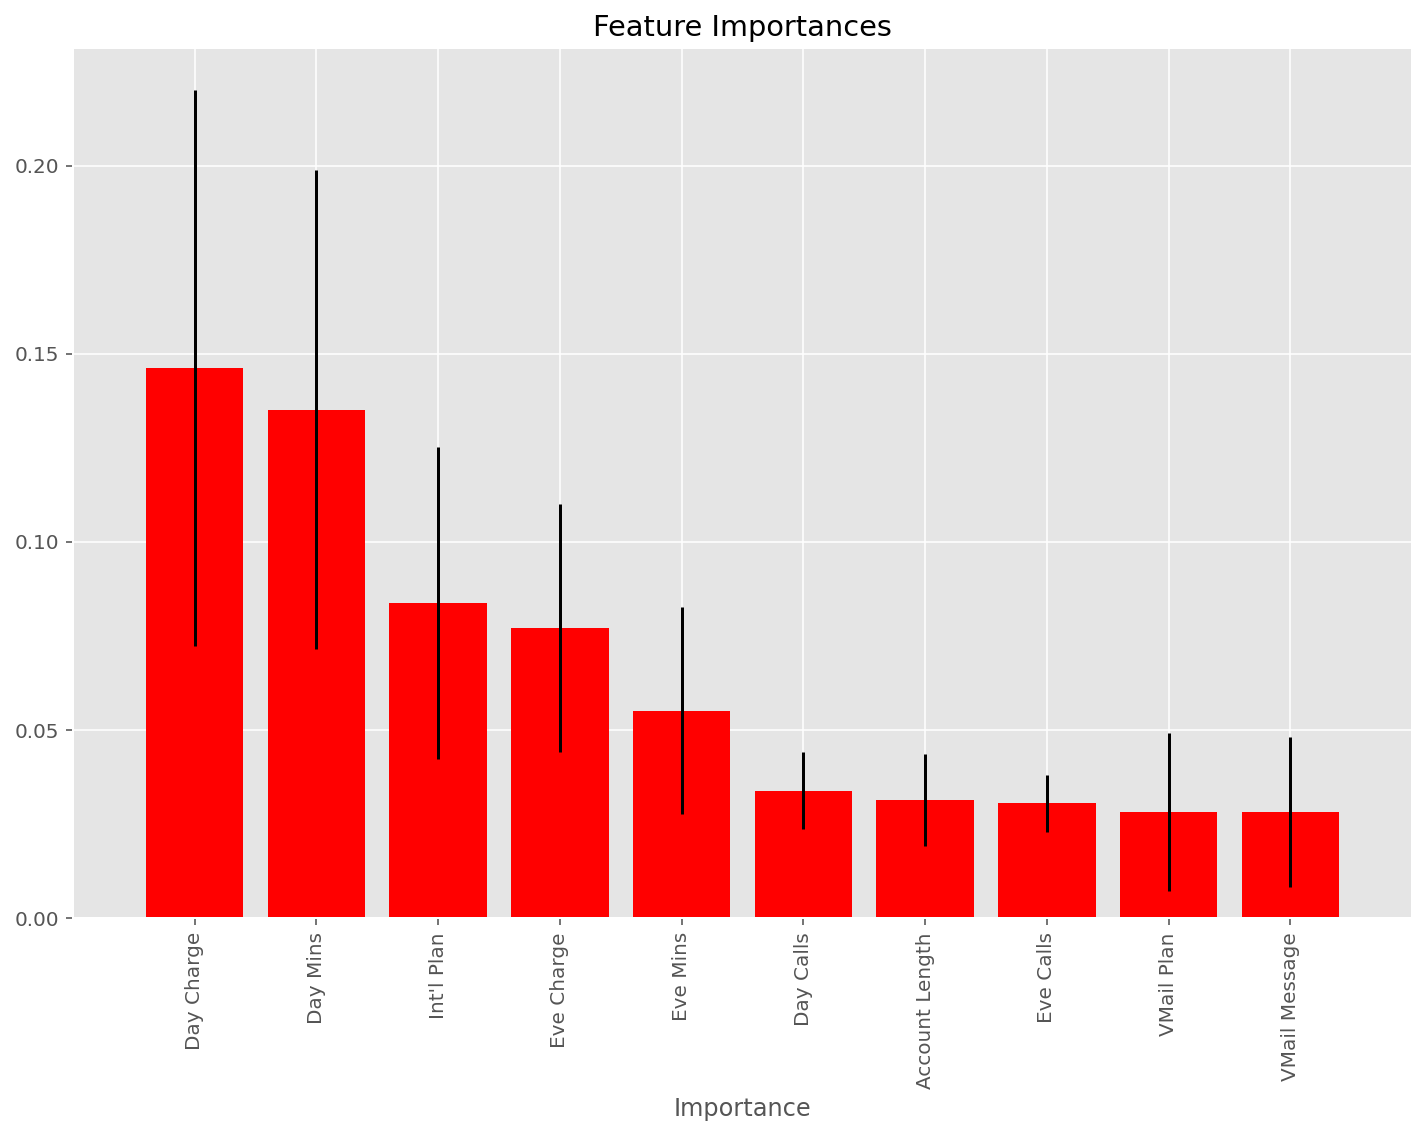

In [14]:
# 13. Calculate the standard deviation for feature importances across all trees

n = 10 # top 10 features

#importances = forest_fit.feature_importances_[:n]
importances = rf.feature_importances_[:n]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = list(df.columns[indices])

# Print the feature ranking
print("\n13. Feature ranking:")

for f in range(n):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
ax.set_xticks(range(10))
ax.set_xticklabels(features, rotation = 90)
ax.set_xlim([-1, 10])
ax.set_xlabel("Importance")
ax.set_title("Feature Importances")

Text(0.5, 1.0, 'Accuracy vs. Num Trees')

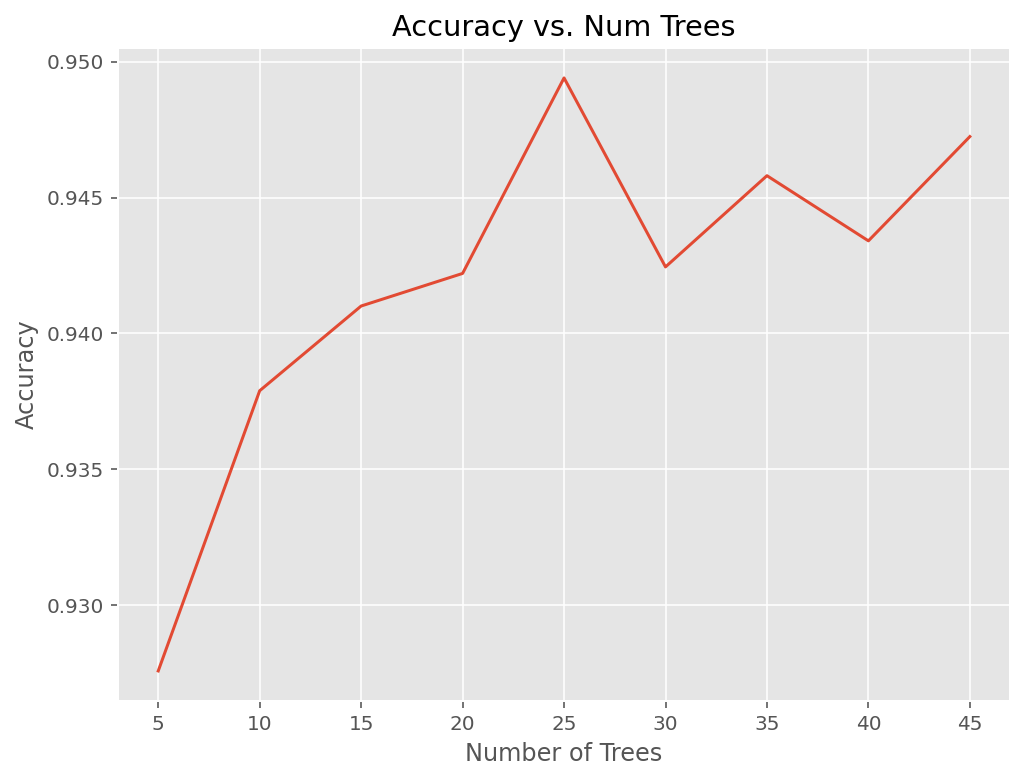

In [15]:
# 14. Try modifying the number of trees
num_trees = range(5, 50, 5)
accuracies = []
for n in num_trees:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
    
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(num_trees, accuracies)
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Accuracy")
ax.set_title('Accuracy vs. Num Trees')

Text(0.5, 1.0, 'Accuracy vs. Num Features')

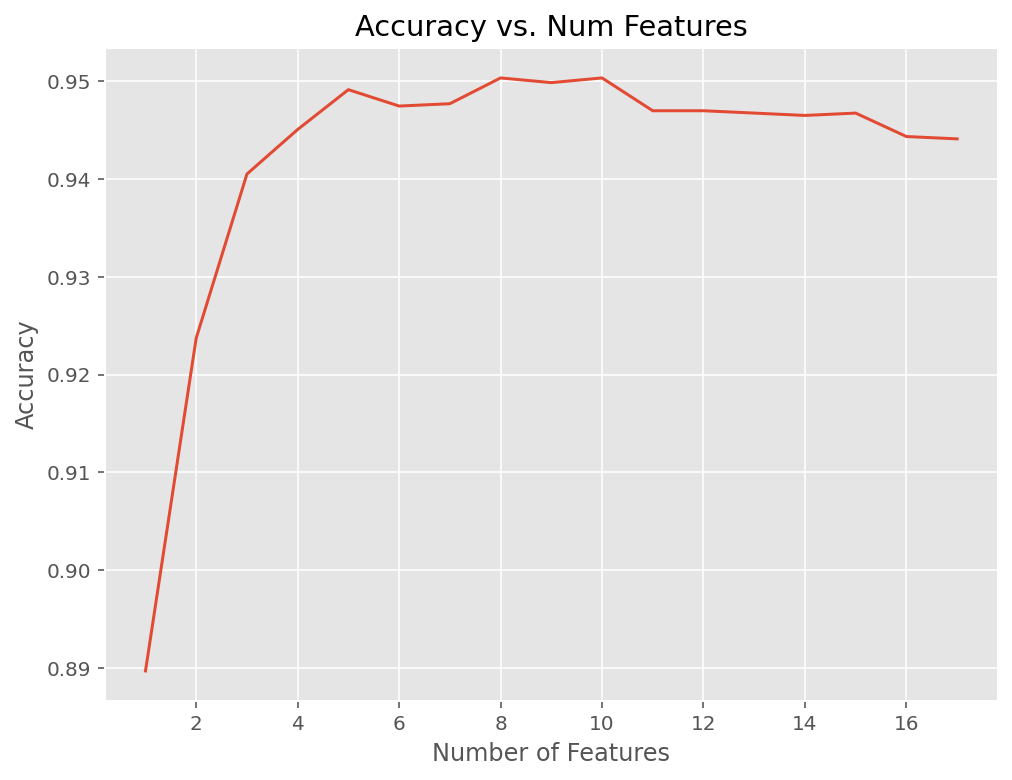

In [16]:
# 15. Try modifying the max features parameter
num_features = range(1, len(X.columns) + 1)
accuracies = []
for n in num_features:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(max_features=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(num_features, accuracies)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title('Accuracy vs. Num Features')
## Levels off around 5-6

In [17]:
# 16. Run all the other classifiers that we have learned so far in class
def get_scores(classifier, X_train, X_test, y_train, y_test, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), \
           precision_score(y_test, y_predict), \
           recall_score(y_test, y_predict)

print("\n16. Model, Accuracy, Precision, Recall")
print("    Random Forest:", get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, n_estimators=25, max_features=5))
print("    Logistic Regression:", get_scores(LogisticRegression, X_train, X_test, y_train, y_test))
print("    Decision Tree:", get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test))
print("    Naive Bayes:", get_scores(MultinomialNB, X_train, X_test, y_train, y_test))
# Results may not match new/previous runs. 
## MODEL               ACCURACY PRECISION    RECALL
## Random Forest         0.9508    0.8817    0.7321
## Logistic Regression   0.8741    0.6129    0.1696
## Decision Tree         0.9209    0.6949    0.7321


16. Model, Accuracy, Precision, Recall
    Random Forest: (0.9412470023980816, 0.8924731182795699, 0.680327868852459)
    Logistic Regression: (0.8477218225419664, 0.4, 0.08196721311475409)
    Decision Tree: (0.9112709832134293, 0.6967213114754098, 0.6967213114754098)
    Naive Bayes: (0.6127098321342925, 0.20527859237536658, 0.5737704918032787)


C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


17. Use the included `plot_roc` function to visualize the roc curve of each model


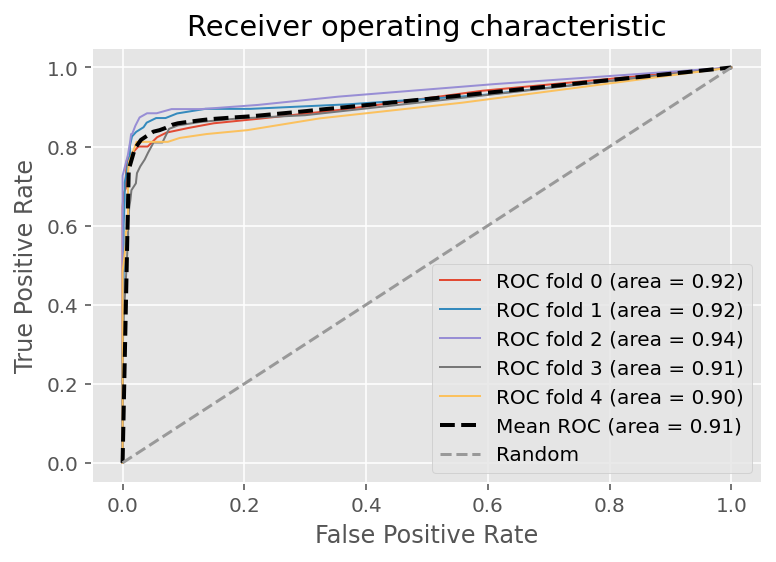

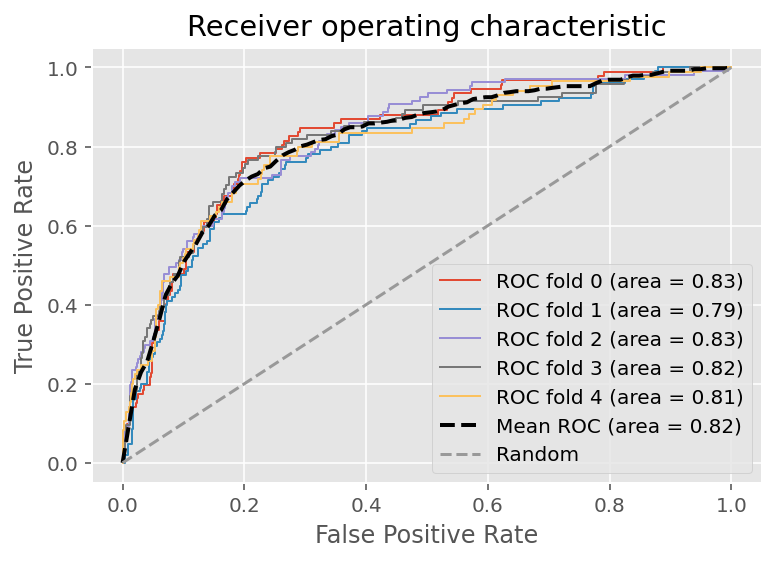

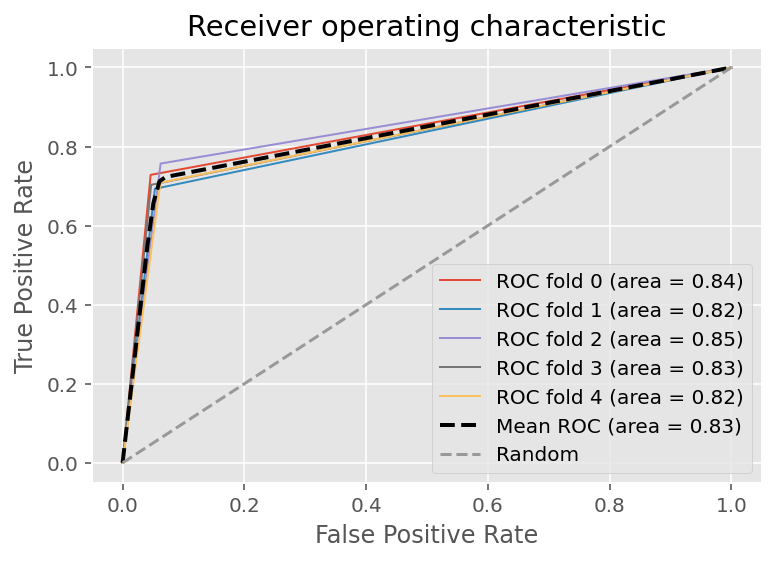

In [18]:
print("17. Use the included `plot_roc` function to visualize the roc curve of each model")
plot_roc(X, y, RandomForestClassifier, 'Random_Forest', n_estimators=25, max_features=5)
plot_roc(X, y, LogisticRegression, 'Logistic_Regression')
plot_roc(X, y, DecisionTreeClassifier, 'Decision_Tree')
#plot_roc(X, y, MultinomialNB, 'Naive_Bayes') 